In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure()
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [2]:
x_arr = np.loadtxt('age kvm x_arr_vts t_2.txt')                                      #all elements are in micron
y_arr = np.loadtxt('age kvm y_arr_vts t_2.txt')                                       #all elements are in micron
t_arr = np.loadtxt('age kvm dt_arr_vts t_2.txt')

In [3]:
len(x_arr)

54408

In [4]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e4                                                                  #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 40
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt

In [5]:
'''timelaglog'''

'timelaglog'

In [6]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m]:
                if timelag <= timelaglog[m+1]:
                    x = x+((x_arr[j]-x_arr[i])**2)
                    y = y+((y_arr[j]-y_arr[i])**2)
                    count = count+1
                else:
                    break;
            else:
                break;           
    print('no. of  points in bin',count) 
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print( 'tau=', np.sqrt(timelaglog[m]*timelaglog[m+1]) )
    counterarray.append(count)
  
    
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2) 

0
no. of  points in bin 1317
tau= 1.4251026703029977e-08
1
no. of  points in bin 1534
tau= 2.8942661247167487e-08
2
no. of  points in bin 1451
tau= 5.878016072274912e-08
3
no. of  points in bin 1466
tau= 1.193776641714437e-07
4
no. of  points in bin 1598
tau= 2.424462017082328e-07
5
no. of  points in bin 1588
tau= 4.923882631706742e-07
6
no. of  points in bin 1668
tau= 1.000000000000001e-06
7
no. of  points in bin 1596
tau= 2.030917620904737e-06
8
no. of  points in bin 1700
tau= 4.124626382901353e-06
9
no. of  points in bin 1707
tau= 8.376776400682917e-06
10
no. of  points in bin 1772
tau= 1.7012542798525893e-05
11
no. of  points in bin 1886
tau= 3.455107294592222e-05
12
no. of  points in bin 1822
tau= 7.01703828670383e-05
13
no. of  points in bin 1980
tau= 0.00014251026703029993
14
no. of  points in bin 2013
tau= 0.0002894266124716755
15
no. of  points in bin 2119
tau= 0.0005878016072274918
16
no. of  points in bin 2180
tau= 0.001193776641714437
17
no. of  points in bin 2269
tau= 0.00

In [7]:
'''np.savetxt('msd_x_iso.txt',msd_xarr)
np.savetxt('msd_y_iso.txt',msd_yarr)
np.savetxt('msd_r_iso.txt',msd_rarr)
np.savetxt('t_arr_formsd_iso.txt',mean_t_arr)
np.savetxt('counterarray.txt',counterarray)'''

In [7]:
msd_rarr = np.array(msd_rarr)
msd_xarr = np.array(msd_xarr)
msd_yarr = np.array(msd_yarr)

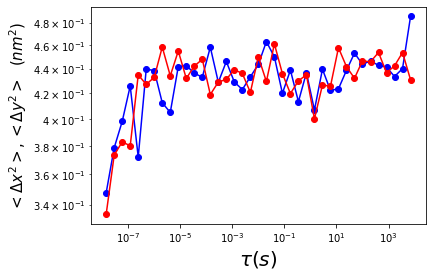

In [8]:
plt.plot(mean_t_arr,msd_xarr*1e18,'bo-')
plt.plot(mean_t_arr,msd_yarr*1e18,'ro-')
plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')
plt.show()

In [10]:
'''plt.plot(mean_t_arr,msd_rarr*1e18,'go-')
plt.ylabel(r'$<\Delta r^2> \ \  (nm^2)$',size=20)
plt.xlabel(r'$\tau  (s)$',size=20)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_long.png')
plt.show()'''

"plt.plot(mean_t_arr,msd_rarr*1e18,'go-')\nplt.ylabel(r'$<\\Delta r^2> \\ \\  (nm^2)$',size=20)\nplt.xlabel(r'$\tau  (s)$',size=20)\nplt.xscale('log')\nplt.yscale('log')\n#plt.savefig('mvm_iso_long.png')\nplt.show()"

In [11]:
'''import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_iso_2.csv", df_a_tp, delimiter=",")'''

'import numpy\na = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])\nindex = [\'time\', \'msd_r\', \'msd_x\', \'msd_y\']\n\nimport pandas as pd\ndf_a = pd.DataFrame(a, index)\ndf_a_tp = pd.DataFrame.transpose(df_a)\n\nnumpy.savetxt("mvm_vts_iso_2.csv", df_a_tp, delimiter=",")'